In [24]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# Load the dataset
df = pd.read_csv('../data/raw/financial_transaction.csv', usecols=lambda col: col not in ['isFlaggedFraud', 'step'])

In [26]:
# Display the first few rows of the dataframe
df.head()  

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [27]:
# Data Validation 
df['newbalanceOrig'] = df['oldbalanceOrg'] - df['amount']
df['newbalanceDest'] = df['oldbalanceDest'] + df['amount']

<Axes: title={'center': 'Common Transaction Types for Fraudulent Transactions'}, xlabel='Transaction Type', ylabel='Number of Fraudulent Transactions'>

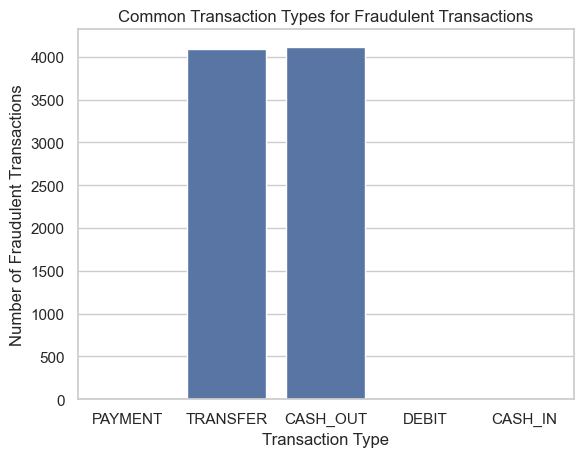

In [28]:
plt.title('Common Transaction Types for Fraudulent Transactions')
plt.ylabel('Number of Fraudulent Transactions')
plt.xlabel('Transaction Type')
sns.set(style="whitegrid")
sns.barplot(x='type', y='isFraud', data=df, estimator=np.sum, errorbar=None)

The figure above shows that most fraudulent transactions in the dataset predominantly occur through transfer and cash out transaction types.

In [29]:
df.isnull().sum()

type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [30]:
df.duplicated().sum()

np.int64(0)

In [38]:
df.groupby('type')['amount'].agg({'mean', 'median'}).round(2)

,mean,median
type,,
CASH_IN,168920.24,143427.71
CASH_OUT,176273.96,147072.18
DEBIT,5483.67,3048.99
PAYMENT,13057.60,9482.19
TRANSFER,910647.01,486308.39


In [37]:
df.groupby('isFraud')['amount'].agg({'mean', 'median'}).round(2)

,mean,median
isFraud,,
0,178197.04,74684.72
1,1467967.30,441423.44
